In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
nurseryNum = pd.read_csv("nursery_numerical.csv")
nurseryNum.columns.values

array(['Parents', ' Has_nurs', ' Form', ' Children', ' Housing',
       ' Finance', ' Social', ' Health', 'Class'], dtype=object)

In [3]:
i = 100
j = 1
features = ['Parents', ' Has_nurs', ' Form', ' Children', ' Housing', ' Finance', ' Social', ' Health']
for index, m in nurseryNum.iterrows():
    if index % 20 == 0:
        nurseryNum.at[index+2, features[j]] = i + 1
        j += 3
        i+=10
        if j >= 7:
            j = 0

In [4]:
i = 0
j = 0
for index, m in nurseryNum.iterrows():
    if index % 20 == 0:
        if index < 12954:
            nurseryNum.at[index+5,:] = nurseryNum.loc[j,:]
        else:
            nurseryNum.at[index+1,:] = nurseryNum.loc[j,:]
        j += 120
        if j >= 12959:
            j = 0

In [5]:
nurseryNum.to_csv('/home/valia/Documents/AppliedDataScience/nureryNoise.csv', sep=',')

In [6]:
data = nurseryNum.iloc[:,0:8]
labels = nurseryNum.iloc[:,8]

In [7]:
kf = KFold(n_splits=2, shuffle=True) #5 fores me 2 folds

### Euclidean and k tuning on 10% noise dataset

In [8]:
acc = []
mean_accuracy_model_euclidean = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

mean_accuracy_model1 =  sum(acc)/10    
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model1

              precision    recall  f1-score   support

  very_recom       0.81      0.85      0.83      2112
    priority       0.78      0.82      0.79      2197
  spec_prior       0.60      1.00      0.75         3
   recommend       0.85      0.75      0.80      2007
   not_recom       0.59      0.70      0.64       161

   micro avg       0.80      0.80      0.80      6480
   macro avg       0.72      0.82      0.76      6480
weighted avg       0.80      0.80      0.80      6480

accuracy:  0.8015432098765433
              precision    recall  f1-score   support

  very_recom       0.82      0.85      0.83      2161
    priority       0.78      0.80      0.79      2070
  spec_prior       0.57      1.00      0.73         4
   recommend       0.84      0.76      0.80      2079
   not_recom       0.58      0.77      0.66       166

   micro avg       0.80      0.80      0.80      6480
   macro avg       0.72      0.84      0.76      6480
weighted avg       0.81      0.80      0.80    

In [9]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

mean_accuracy_model1 =  sum(acc)/10    
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model1

              precision    recall  f1-score   support

  very_recom       0.89      0.94      0.91      2142
    priority       0.86      0.90      0.88      2183
  spec_prior       0.43      1.00      0.60         3
   recommend       0.92      0.84      0.88      2000
   not_recom       0.90      0.64      0.75       152

   micro avg       0.89      0.89      0.89      6480
   macro avg       0.80      0.86      0.80      6480
weighted avg       0.89      0.89      0.89      6480

accuracy:  0.8888888888888888
              precision    recall  f1-score   support

  very_recom       0.91      0.94      0.92      2131
    priority       0.84      0.92      0.88      2084
  spec_prior       0.50      1.00      0.67         4
   recommend       0.93      0.83      0.88      2086
   not_recom       0.92      0.62      0.74       175

   micro avg       0.89      0.89      0.89      6480
   macro avg       0.82      0.86      0.82      6480
weighted avg       0.89      0.89      0.89    

In [10]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

mean_accuracy_model1 =  sum(acc)/10    
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model1

              precision    recall  f1-score   support

  very_recom       0.91      0.95      0.93      2119
    priority       0.84      0.92      0.88      2134
  spec_prior       0.38      1.00      0.55         3
   recommend       0.93      0.82      0.87      2060
   not_recom       0.90      0.68      0.78       164

   micro avg       0.89      0.89      0.89      6480
   macro avg       0.79      0.87      0.80      6480
weighted avg       0.89      0.89      0.89      6480

accuracy:  0.8912037037037037


/home/valia/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

  very_recom       0.92      0.94      0.93      2154
    priority       0.86      0.89      0.88      2133
  spec_prior       0.00      0.00      0.00         4
   recommend       0.90      0.88      0.89      2026
   not_recom       0.91      0.64      0.75       163

   micro avg       0.89      0.89      0.89      6480
   macro avg       0.72      0.67      0.69      6480
weighted avg       0.89      0.89      0.89      6480

accuracy:  0.8944444444444445
              precision    recall  f1-score   support

  very_recom       0.91      0.95      0.93      2140
    priority       0.86      0.92      0.89      2165
  spec_prior       0.33      1.00      0.50         3
   recommend       0.92      0.83      0.87      2005
   not_recom       0.94      0.62      0.74       167

   micro avg       0.89      0.89      0.89      6480
   macro avg       0.79      0.86      0.79      6480
weighted avg       0.90      0.89      0.89    

In [11]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

mean_accuracy_model1 =  sum(acc)/10    
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model1

              precision    recall  f1-score   support

  very_recom       0.93      0.93      0.93      2112
    priority       0.86      0.91      0.89      2127
  spec_prior       0.00      0.00      0.00         3
   recommend       0.90      0.87      0.89      2075
   not_recom       0.92      0.69      0.79       163

   micro avg       0.90      0.90      0.90      6480
   macro avg       0.72      0.68      0.70      6480
weighted avg       0.90      0.90      0.90      6480

accuracy:  0.8981481481481481
              precision    recall  f1-score   support

  very_recom       0.92      0.94      0.93      2161
    priority       0.85      0.92      0.88      2140
  spec_prior       0.00      0.00      0.00         4
   recommend       0.91      0.84      0.87      2011
   not_recom       0.91      0.62      0.74       164

   micro avg       0.89      0.89      0.89      6480
   macro avg       0.72      0.66      0.68      6480
weighted avg       0.89      0.89      0.89    

In [12]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

mean_accuracy_model1 =  sum(acc)/10    
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model1

              precision    recall  f1-score   support

  very_recom       0.91      0.95      0.93      2123
    priority       0.84      0.91      0.88      2089
  spec_prior       0.00      0.00      0.00         4
   recommend       0.92      0.84      0.88      2096
   not_recom       0.95      0.52      0.67       168

   micro avg       0.89      0.89      0.89      6480
   macro avg       0.72      0.65      0.67      6480
weighted avg       0.89      0.89      0.89      6480

accuracy:  0.8904320987654321
              precision    recall  f1-score   support

  very_recom       0.94      0.94      0.94      2150
    priority       0.87      0.90      0.89      2178
  spec_prior       0.00      0.00      0.00         3
   recommend       0.89      0.89      0.89      1990
   not_recom       0.90      0.57      0.70       159

   micro avg       0.90      0.90      0.90      6480
   macro avg       0.72      0.66      0.68      6480
weighted avg       0.90      0.90      0.90    

In [13]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

mean_accuracy_model1 =  sum(acc)/10    
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model1

              precision    recall  f1-score   support

  very_recom       0.89      0.92      0.91      2124
    priority       0.88      0.87      0.88      2207
  spec_prior       0.87      0.87      0.87      1995
   not_recom       0.97      0.51      0.67       154

   micro avg       0.88      0.88      0.88      6480
   macro avg       0.90      0.79      0.83      6480
weighted avg       0.88      0.88      0.88      6480

accuracy:  0.8800925925925925
              precision    recall  f1-score   support

  very_recom       0.90      0.92      0.91      2149
    priority       0.83      0.90      0.86      2060
  spec_prior       0.00      0.00      0.00         7
   recommend       0.89      0.84      0.87      2091
   not_recom       0.91      0.45      0.60       173

   micro avg       0.87      0.87      0.87      6480
   macro avg       0.70      0.62      0.65      6480
weighted avg       0.87      0.87      0.87      6480

accuracy:  0.8719135802469136
              pr

In [14]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

mean_accuracy_model1 =  sum(acc)/10    
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model1

              precision    recall  f1-score   support

  very_recom       0.84      0.90      0.87      2135
    priority       0.81      0.87      0.84      2147
  spec_prior       0.00      0.00      0.00         5
   recommend       0.87      0.79      0.83      2028
   not_recom       0.90      0.28      0.43       165

   micro avg       0.84      0.84      0.84      6480
   macro avg       0.68      0.57      0.59      6480
weighted avg       0.84      0.84      0.83      6480

accuracy:  0.8382716049382716
              precision    recall  f1-score   support

  very_recom       0.89      0.88      0.89      2138
    priority       0.84      0.88      0.86      2120
  spec_prior       0.00      0.00      0.00         2
   recommend       0.85      0.85      0.85      2058
   not_recom       0.92      0.43      0.59       162

   micro avg       0.86      0.86      0.86      6480
   macro avg       0.70      0.61      0.64      6480
weighted avg       0.86      0.86      0.86    

In [15]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=100, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

mean_accuracy_model1 =  sum(acc)/10    
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model1

              precision    recall  f1-score   support

  very_recom       0.75      0.81      0.78      2143
    priority       0.79      0.81      0.80      2130
  spec_prior       0.00      0.00      0.00         3
   recommend       0.81      0.79      0.80      2032
   not_recom       0.89      0.15      0.25       172

   micro avg       0.78      0.78      0.78      6480
   macro avg       0.65      0.51      0.53      6480
weighted avg       0.79      0.78      0.78      6480

accuracy:  0.7847222222222222
              precision    recall  f1-score   support

  very_recom       0.74      0.81      0.77      2130
    priority       0.79      0.81      0.80      2137
  spec_prior       0.00      0.00      0.00         4
   recommend       0.82      0.77      0.79      2054
   not_recom       0.89      0.21      0.34       155

   micro avg       0.78      0.78      0.78      6480
   macro avg       0.65      0.52      0.54      6480
weighted avg       0.78      0.78      0.78    

In [16]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=150, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

mean_accuracy_model1 =  sum(acc)/10    
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model1

              precision    recall  f1-score   support

  very_recom       0.69      0.72      0.70      2165
    priority       0.77      0.81      0.79      2098
  spec_prior       0.00      0.00      0.00         5
   recommend       0.78      0.76      0.77      2048
   not_recom       0.76      0.10      0.17       164

   micro avg       0.75      0.75      0.75      6480
   macro avg       0.60      0.48      0.49      6480
weighted avg       0.75      0.75      0.74      6480

accuracy:  0.7450617283950617
              precision    recall  f1-score   support

  very_recom       0.67      0.78      0.72      2108
    priority       0.79      0.73      0.76      2169
  spec_prior       0.00      0.00      0.00         2
   recommend       0.80      0.79      0.79      2038
   not_recom       0.67      0.02      0.05       163

   micro avg       0.75      0.75      0.75      6480
   macro avg       0.58      0.46      0.46      6480
weighted avg       0.75      0.75      0.74    

[0.802885802469136, 0.891929012345679, 0.8919753086419753, 0.8970987654320988, 0.8964351851851852, 0.8785493827160493, 0.8459413580246913, 0.7756018518518519, 0.738533950617284]


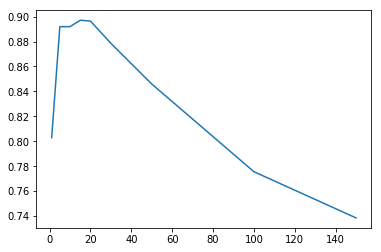

In [17]:
print mean_accuracy_model_euclidean
k = [1, 5, 10, 15, 20, 30, 50, 100, 150]
fig = plt.figure()
ax = plt.axes()
ax.plot(k, mean_accuracy_model_euclidean)
plt.show()

### Minkowski and k tuning on 10% noise dataset

In [18]:
acc = []
mean_accuracy_model_minkowski = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model10 = sum(acc)/10  
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model10

set([' very_recom', ' priority', ' spec_prior', ' recommend', ' not_recom'])
              precision    recall  f1-score   support

  very_recom       0.81      0.86      0.83      2126
    priority       0.78      0.81      0.79      2142
  spec_prior       1.00      1.00      1.00         3
   recommend       0.87      0.76      0.81      2047
   not_recom       0.61      0.69      0.65       162

   micro avg       0.81      0.81      0.81      6480
   macro avg       0.81      0.82      0.82      6480
weighted avg       0.81      0.81      0.81      6480

accuracy:  0.8067901234567901
set([' very_recom', ' priority', ' spec_prior', ' recommend', ' not_recom'])
              precision    recall  f1-score   support

  very_recom       0.82      0.82      0.82      2147
    priority       0.75      0.81      0.78      2125
  spec_prior       0.44      1.00      0.62         4
   recommend       0.85      0.75      0.80      2039
   not_recom       0.51      0.70      0.59       165

 

In [19]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model_minkowski.append(sum(acc)/10)


set([' very_recom', ' priority', ' spec_prior', ' recommend', ' not_recom'])
              precision    recall  f1-score   support

  very_recom       0.90      0.95      0.92      2135
    priority       0.85      0.91      0.88      2128
  spec_prior       0.50      1.00      0.67         4
   recommend       0.92      0.83      0.87      2052
   not_recom       0.96      0.66      0.78       161

   micro avg       0.89      0.89      0.89      6480
   macro avg       0.83      0.87      0.82      6480
weighted avg       0.89      0.89      0.89      6480

accuracy:  0.8887345679012346
set([' very_recom', ' priority', ' spec_prior', ' recommend', ' not_recom'])
              precision    recall  f1-score   support

  very_recom       0.90      0.93      0.92      2138
    priority       0.86      0.92      0.89      2139
  spec_prior       0.38      1.00      0.55         3
   recommend       0.92      0.85      0.88      2034
   not_recom       0.90      0.57      0.70       166

 

In [20]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model_minkowski.append(sum(acc)/10)


              precision    recall  f1-score   support

  very_recom       0.92      0.93      0.92      2136
    priority       0.85      0.91      0.88      2106
  spec_prior       0.00      0.00      0.00         5
   recommend       0.93      0.85      0.89      2070
   not_recom       0.86      0.76      0.81       163

   micro avg       0.89      0.89      0.89      6480
   macro avg       0.71      0.69      0.70      6480
weighted avg       0.90      0.89      0.89      6480

accuracy:  0.8949074074074074
set([' very_recom', ' priority', ' spec_prior', ' recommend', ' not_recom'])
              precision    recall  f1-score   support

  very_recom       0.91      0.94      0.93      2137
    priority       0.85      0.90      0.88      2161
  spec_prior       0.15      1.00      0.27         2
   recommend       0.91      0.84      0.88      2016
   not_recom       0.92      0.59      0.72       164

   micro avg       0.89      0.89      0.89      6480
   macro avg       0.75 

In [21]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model_minkowski.append(sum(acc)/10)


              precision    recall  f1-score   support

  very_recom       0.92      0.94      0.93      2122
    priority       0.87      0.90      0.88      2156
  spec_prior       0.00      0.00      0.00         6
   recommend       0.90      0.87      0.88      2038
   not_recom       0.84      0.61      0.71       158

   micro avg       0.90      0.90      0.90      6480
   macro avg       0.71      0.66      0.68      6480
weighted avg       0.89      0.90      0.89      6480

accuracy:  0.8958333333333334
set([' very_recom', ' priority', ' spec_prior', ' recommend', ' not_recom'])
              precision    recall  f1-score   support

  very_recom       0.92      0.93      0.93      2151
    priority       0.86      0.92      0.89      2111
  spec_prior       0.00      0.00      0.00         1
   recommend       0.92      0.85      0.88      2048
   not_recom       0.95      0.62      0.75       169

   micro avg       0.90      0.90      0.90      6480
   macro avg       0.73 

In [22]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model_minkowski.append(sum(acc)/10)


              precision    recall  f1-score   support

  very_recom       0.92      0.95      0.94      2091
    priority       0.87      0.91      0.89      2209
  spec_prior       0.00      0.00      0.00         3
   recommend       0.92      0.87      0.89      2018
   not_recom       0.92      0.59      0.72       159

   micro avg       0.90      0.90      0.90      6480
   macro avg       0.73      0.66      0.69      6480
weighted avg       0.90      0.90      0.90      6480

accuracy:  0.9018518518518519
              precision    recall  f1-score   support

  very_recom       0.94      0.94      0.94      2182
    priority       0.86      0.91      0.88      2058
  spec_prior       0.00      0.00      0.00         4
   recommend       0.90      0.88      0.89      2068
   not_recom       0.93      0.53      0.67       168

   micro avg       0.90      0.90      0.90      6480
   macro avg       0.73      0.65      0.68      6480
weighted avg       0.90      0.90      0.90    

In [23]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model_minkowski.append(sum(acc)/10)


              precision    recall  f1-score   support

  very_recom       0.89      0.92      0.90      2108
    priority       0.86      0.88      0.87      2152
  spec_prior       0.00      0.00      0.00         6
   recommend       0.88      0.86      0.87      2058
   not_recom       0.90      0.54      0.67       156

   micro avg       0.88      0.88      0.88      6480
   macro avg       0.71      0.64      0.66      6480
weighted avg       0.88      0.88      0.87      6480

accuracy:  0.8760802469135802
              precision    recall  f1-score   support

  very_recom       0.91      0.92      0.92      2165
    priority       0.84      0.91      0.87      2115
  spec_prior       0.00      0.00      0.00         1
   recommend       0.91      0.85      0.88      2028
   not_recom       0.99      0.43      0.60       171

   micro avg       0.88      0.88      0.88      6480
   macro avg       0.73      0.62      0.65      6480
weighted avg       0.89      0.88      0.88    

In [24]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model_minkowski.append(sum(acc)/10)


              precision    recall  f1-score   support

  very_recom       0.83      0.90      0.87      2094
    priority       0.83      0.85      0.84      2191
  spec_prior       0.00      0.00      0.00         5
   recommend       0.87      0.82      0.84      2032
   not_recom       0.88      0.38      0.53       158

   micro avg       0.84      0.84      0.84      6480
   macro avg       0.68      0.59      0.62      6480
weighted avg       0.84      0.84      0.84      6480

accuracy:  0.8438271604938271
              precision    recall  f1-score   support

  very_recom       0.87      0.88      0.87      2179
    priority       0.81      0.88      0.85      2076
  spec_prior       0.00      0.00      0.00         2
   recommend       0.87      0.83      0.85      2054
   not_recom       0.95      0.37      0.53       169

   micro avg       0.85      0.85      0.85      6480
   macro avg       0.70      0.59      0.62      6480
weighted avg       0.85      0.85      0.85    

In [25]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=100, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model_minkowski.append(sum(acc)/10)


              precision    recall  f1-score   support

  very_recom       0.71      0.79      0.75      2154
    priority       0.78      0.78      0.78      2162
  spec_prior       0.00      0.00      0.00         5
   recommend       0.79      0.75      0.77      2008
   not_recom       0.76      0.15      0.24       151

   micro avg       0.76      0.76      0.76      6480
   macro avg       0.61      0.49      0.51      6480
weighted avg       0.76      0.76      0.75      6480

accuracy:  0.7577160493827161
              precision    recall  f1-score   support

  very_recom       0.75      0.82      0.78      2119
    priority       0.79      0.84      0.82      2105
  spec_prior       0.00      0.00      0.00         2
   recommend       0.83      0.77      0.80      2078
   not_recom       0.94      0.18      0.30       176

   micro avg       0.79      0.79      0.79      6480
   macro avg       0.66      0.52      0.54      6480
weighted avg       0.80      0.79      0.79    

In [26]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(nurseryNum):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=150, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model_minkowski.append(sum(acc)/10)


              precision    recall  f1-score   support

  very_recom       0.69      0.72      0.70      2161
    priority       0.75      0.80      0.77      2120
  spec_prior       0.00      0.00      0.00         5
   recommend       0.78      0.77      0.77      2007
   not_recom       0.00      0.00      0.00       187

   micro avg       0.74      0.74      0.74      6480
   macro avg       0.44      0.46      0.45      6480
weighted avg       0.72      0.74      0.73      6480

accuracy:  0.7376543209876543
              precision    recall  f1-score   support

  very_recom       0.64      0.77      0.70      2112
    priority       0.79      0.74      0.76      2147
  spec_prior       0.00      0.00      0.00         2
   recommend       0.79      0.73      0.76      2079
   not_recom       0.88      0.15      0.26       140

   micro avg       0.73      0.73      0.73      6480
   macro avg       0.62      0.48      0.50      6480
weighted avg       0.74      0.73      0.73    

[0.80320987654321, 0.8909413580246912, 0.8943055555555555, 0.8953395061728395, 0.8964197530864197, 0.8803240740740741, 0.8470216049382715, 0.7753086419753087, 0.737145061728395]


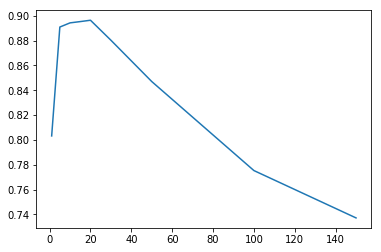

In [27]:
print mean_accuracy_model_minkowski
k = [1, 5, 10, 15, 20, 30, 50, 100, 150]
fig = plt.figure()
ax = plt.axes()
ax.plot(k, mean_accuracy_model_minkowski)
plt.show()

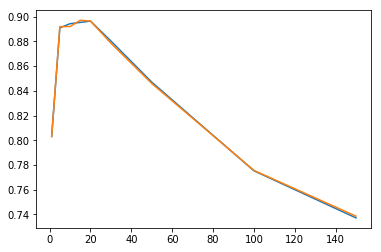

In [28]:
fig = plt.figure()
ax = plt.axes()
ax.plot(k, mean_accuracy_model_minkowski)
ax.plot(k, mean_accuracy_model_euclidean)
plt.show()